In [192]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [320]:
meuble = pd.read_csv("meuble.csv")

In [321]:
meuble.head()

,type,secteur,etage,surface habitable,surface totale,nbr chambre,nbr salleBain,salon,age de bien,prix
0,"appartements, à vendre",beauséjour,4,119.0,NaN,3,2,1,NaN,1 950 000 DH
1,"appartements, à vendre",aïn chock,2,NaN,2,2,1,1,NaN,670 000 DH
2,"appartements, à vendre",sidi bernoussi,6,50.0,NaN,3,NaN,NaN,NaN,250 000 DH
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"appartements, à vendre",sidi bernoussi,4,64.0,NaN,2,NaN,NaN,neuf,8 500 DH


Faire le nettoyage de données

In [322]:
meuble.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10075 entries, 0 to 10074
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   type               9793 non-null   object 
 1   secteur            9436 non-null   object 
 2   etage              9700 non-null   object 
 3   surface habitable  9312 non-null   float64
 4   surface totale     7681 non-null   object 
 5   nbr chambre        9719 non-null   object 
 6   nbr salleBain      9542 non-null   object 
 7   salon              9464 non-null   object 
 8   age de bien        7789 non-null   object 
 9   prix               7776 non-null   object 
dtypes: float64(1), object(9)
memory usage: 787.2+ KB


In [323]:
meuble.isnull()

,type,secteur,etage,surface habitable,surface totale,nbr chambre,nbr salleBain,salon,age de bien,prix
0,False,False,False,False,True,False,False,False,True,False
1,False,False,False,True,False,False,False,False,True,False
2,False,False,False,False,True,False,True,True,True,False
3,True,True,True,True,True,True,True,True,True,True
4,False,False,False,False,True,False,True,True,False,False
...,...,...,...,...,...,...,...,...,...,...
10070,False,False,False,False,False,False,False,False,False,False
10071,False,False,True,True,True,False,False,False,False,False
10072,False,False,False,False,False,False,False,False,False,False
10073,False,False,False,False,False,False,False,False,False,False


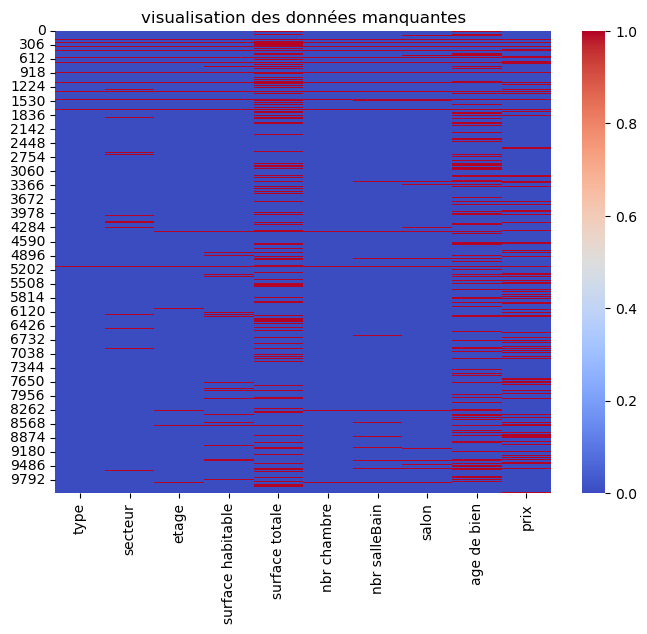

In [324]:
plt.figure(figsize=(8,6))
sns.heatmap(meuble.isnull(), cbar=True, cmap='coolwarm')
plt.title("visualisation des données manquantes")
plt.show()

In [325]:
meubleNa = meuble.dropna(how='all')

In [326]:
meubleNa.isnull()

,type,secteur,etage,surface habitable,surface totale,nbr chambre,nbr salleBain,salon,age de bien,prix
0,False,False,False,False,True,False,False,False,True,False
1,False,False,False,True,False,False,False,False,True,False
2,False,False,False,False,True,False,True,True,True,False
4,False,False,False,False,True,False,True,True,False,False
5,False,False,False,False,False,False,True,True,False,False
...,...,...,...,...,...,...,...,...,...,...
10070,False,False,False,False,False,False,False,False,False,False
10071,False,False,True,True,True,False,False,False,False,False
10072,False,False,False,False,False,False,False,False,False,False
10073,False,False,False,False,False,False,False,False,False,False


In [327]:
meubleNa.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9794 entries, 0 to 10074
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   type               9793 non-null   object 
 1   secteur            9436 non-null   object 
 2   etage              9700 non-null   object 
 3   surface habitable  9312 non-null   float64
 4   surface totale     7681 non-null   object 
 5   nbr chambre        9719 non-null   object 
 6   nbr salleBain      9542 non-null   object 
 7   salon              9464 non-null   object 
 8   age de bien        7789 non-null   object 
 9   prix               7776 non-null   object 
dtypes: float64(1), object(9)
memory usage: 841.7+ KB


In [328]:
meubleNa

,type,secteur,etage,surface habitable,surface totale,nbr chambre,nbr salleBain,salon,age de bien,prix
0,"appartements, à vendre",beauséjour,4,119.0,NaN,3,2,1,NaN,1 950 000 DH
1,"appartements, à vendre",aïn chock,2,NaN,2,2,1,1,NaN,670 000 DH
2,"appartements, à vendre",sidi bernoussi,6,50.0,NaN,3,NaN,NaN,NaN,250 000 DH
4,"appartements, à vendre",sidi bernoussi,4,64.0,NaN,2,NaN,NaN,neuf,8 500 DH
5,"appartements, à vendre",sidi bernoussi,rez de chaussée,49.0,100,3,NaN,NaN,neuf,7 200 DH
...,...,...,...,...,...,...,...,...,...,...
10070,"appartements, à vendre",laimoune,1,73.0,73,2,2,1,6-10 ans,830 000 DH
10071,"appartements, à vendre",hay moulay rachid,NaN,NaN,NaN,2,1,1,neuf,360 000 DH
10072,"appartements, à vendre",aïn diab,5,106.0,106,2,2,1,11-20 ans,1 700 000 DH
10073,"appartements, à vendre",sidi moumen,2,64.0,68,4,1,1,6-10 ans,430 000 DH


In [329]:
# Supposons que votre DataFrame soit appelé 'df'
nombre_colonnes_null = 0  # Nombre maximal de valeurs null autorisé par ligne

# Supprimer les lignes ayant plus de 'nombre_colonnes_null' valeurs null
meubleNa = meubleNa.dropna(thresh=meubleNa.shape[1] - nombre_colonnes_null)

In [330]:
meubleNa.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4917 entries, 6 to 10074
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   type               4917 non-null   object 
 1   secteur            4917 non-null   object 
 2   etage              4917 non-null   object 
 3   surface habitable  4917 non-null   float64
 4   surface totale     4917 non-null   object 
 5   nbr chambre        4917 non-null   object 
 6   nbr salleBain      4917 non-null   object 
 7   salon              4917 non-null   object 
 8   age de bien        4917 non-null   object 
 9   prix               4917 non-null   object 
dtypes: float64(1), object(9)
memory usage: 422.6+ KB


In [331]:
meubleNa

,type,secteur,etage,surface habitable,surface totale,nbr chambre,nbr salleBain,salon,age de bien,prix
6,"appartements, à vendre",sidi moumen,4,65.0,65,2,1,1,6-10 ans,420 000 DH
9,"appartements, à vendre",maarif,5,127.0,127,3,2,1,6-10 ans,1 750 000 DH
16,"appartements, à vendre",sidi moumen,4,65.0,65,2,1,1,6-10 ans,420 000 DH
19,"appartements, à vendre",autre secteur,3,56.0,56,1,1,1,1-5 ans,600 000 DH
23,"appartements, à vendre",aïn sebaâ,1,109.0,122,3,2,1,neuf,1 070 000 DH
...,...,...,...,...,...,...,...,...,...,...
10066,"appartements, à vendre",anfa,4,45.0,45,1,1,1,11-20 ans,900 000 DH
10070,"appartements, à vendre",laimoune,1,73.0,73,2,2,1,6-10 ans,830 000 DH
10072,"appartements, à vendre",aïn diab,5,106.0,106,2,2,1,11-20 ans,1 700 000 DH
10073,"appartements, à vendre",sidi moumen,2,64.0,68,4,1,1,6-10 ans,430 000 DH


In [332]:
meubleNa = meubleNa.copy()

In [333]:
meubleNa['prix'] = meubleNa['prix'].str.replace(r'(\d) DH', r'\1', regex=True)

In [334]:
meubleNa['prix'] = meubleNa['prix'].str.replace('\u202f', '').astype(float)

In [335]:
meubleNa

,type,secteur,etage,surface habitable,surface totale,nbr chambre,nbr salleBain,salon,age de bien,prix
6,"appartements, à vendre",sidi moumen,4,65.0,65,2,1,1,6-10 ans,420000.0
9,"appartements, à vendre",maarif,5,127.0,127,3,2,1,6-10 ans,1750000.0
16,"appartements, à vendre",sidi moumen,4,65.0,65,2,1,1,6-10 ans,420000.0
19,"appartements, à vendre",autre secteur,3,56.0,56,1,1,1,1-5 ans,600000.0
23,"appartements, à vendre",aïn sebaâ,1,109.0,122,3,2,1,neuf,1070000.0
...,...,...,...,...,...,...,...,...,...,...
10066,"appartements, à vendre",anfa,4,45.0,45,1,1,1,11-20 ans,900000.0
10070,"appartements, à vendre",laimoune,1,73.0,73,2,2,1,6-10 ans,830000.0
10072,"appartements, à vendre",aïn diab,5,106.0,106,2,2,1,11-20 ans,1700000.0
10073,"appartements, à vendre",sidi moumen,2,64.0,68,4,1,1,6-10 ans,430000.0


In [336]:
# modifier la colonne etage en float
meubleNa['etage'] = meubleNa['etage'].str.replace('rez de chaussée', '0')
meubleNa['etage'] = meubleNa['etage'].str.replace('7+', '7')
meubleNa['etage'] = meubleNa['etage'].astype(float)

In [337]:
# Modifier la surface totale en float
meubleNa['surface totale'] = meubleNa['surface totale'].replace('--', np.nan)
meubleNa['surface totale'] = meubleNa['surface totale'].astype(float)

In [338]:
# Convertir la colonne nombre de chambre
meubleNa['nbr chambre'] = meubleNa['nbr chambre'].str.replace('10+', '10')
meubleNa['nbr chambre'] = meubleNa['nbr chambre'].astype(float)

In [339]:
# Convertir la colonne nombre de salle de bain
meubleNa['nbr salleBain'] = meubleNa['nbr salleBain'].str.replace('7+', '7')
meubleNa['nbr salleBain'] = meubleNa['nbr salleBain'].astype(float)

In [340]:
# Convertir la colonne salon en float
meubleNa['salon'] = meubleNa['salon'].str.replace('7+', '7')
meubleNa['salon'] = meubleNa['salon'].astype(float)

In [341]:
meubleNa

,type,secteur,etage,surface habitable,surface totale,nbr chambre,nbr salleBain,salon,age de bien,prix
6,"appartements, à vendre",sidi moumen,4.0,65.0,65.0,2.0,1.0,1.0,6-10 ans,420000.0
9,"appartements, à vendre",maarif,5.0,127.0,127.0,3.0,2.0,1.0,6-10 ans,1750000.0
16,"appartements, à vendre",sidi moumen,4.0,65.0,65.0,2.0,1.0,1.0,6-10 ans,420000.0
19,"appartements, à vendre",autre secteur,3.0,56.0,56.0,1.0,1.0,1.0,1-5 ans,600000.0
23,"appartements, à vendre",aïn sebaâ,1.0,109.0,122.0,3.0,2.0,1.0,neuf,1070000.0
...,...,...,...,...,...,...,...,...,...,...
10066,"appartements, à vendre",anfa,4.0,45.0,45.0,1.0,1.0,1.0,11-20 ans,900000.0
10070,"appartements, à vendre",laimoune,1.0,73.0,73.0,2.0,2.0,1.0,6-10 ans,830000.0
10072,"appartements, à vendre",aïn diab,5.0,106.0,106.0,2.0,2.0,1.0,11-20 ans,1700000.0
10073,"appartements, à vendre",sidi moumen,2.0,64.0,68.0,4.0,1.0,1.0,6-10 ans,430000.0


In [342]:
meubleNa.index.name = 'index'

In [343]:
meubleNa.reset_index(drop=True, inplace=True)

In [344]:
meubleNa['appart'] = meubleNa.index + 1

In [345]:
meubleNa.set_index('appart', inplace=True)

In [346]:
meubleNa['age de bien'] = meubleNa['age de bien'].str.replace(' ans', '')

In [347]:
meubleNa['age de bien'] = meubleNa['age de bien'].str.replace('21+', '21')

In [348]:
meubleNa['age de bien'] = meubleNa['age de bien'].str.replace('neuf', '0')

Note: j'ai changé age de bien qui était en intervalle en catégorie donc : 
0 : qui represente neuf est la première categorie representé par 1
1-5 : 5
6-10 : 10,
11-20 : 15,
21: 20

In [349]:
meubleNa['age de bien'] = meubleNa['age de bien'].replace({
    '0': '1',
    '1-5': '5',
    '6-10': '10',
    '11-20': '15',
    '21': '20'
})

In [350]:
# Convertir la colonne secteur 
meubleNa['secteur'] = meubleNa['secteur'].astype(str)

In [351]:
meubleNa.isnull().sum()

type                 0
secteur              0
etage                0
surface habitable    0
surface totale       3
nbr chambre          0
nbr salleBain        0
salon                0
age de bien          0
prix                 0
dtype: int64

In [352]:
meubleNa['surface totale'].fillna(meubleNa['surface habitable'], inplace=True)

In [353]:
meubleNa.count()

type                 4917
secteur              4917
etage                4917
surface habitable    4917
surface totale       4917
nbr chambre          4917
nbr salleBain        4917
salon                4917
age de bien          4917
prix                 4917
dtype: int64

In [354]:
# Enregistrer le DataFrame au format CSV
meubleNa.to_csv('apart_sans_na.csv', index=False)  # Remplacez 'nom_du_fichier.csv' par le nom que vous souhaitez donner à votre fichier